In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# Ruta base
path = "/home/aninotna/magister/tesis/justh2_pipeline/scripts/calliope_v5/data/pv_cf/"

# Cargar todos los CSV en un solo DataFrame
files = glob.glob(os.path.join(path, "pv_cf_*.csv"))


In [16]:
dfs = []
for f in files:
    df = pd.read_csv(f, parse_dates=["timesteps"])
    name = os.path.basename(f).replace(".csv", "")
    _, _, model, model2, scenario = name.split("_")  # ejemplo: pv_cf_access_cm2_ssp245
    df["model"] = model + "_" + model2
    df["scenario"] = scenario
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)


In [17]:
# Ver estructura
print(data.head())


   timesteps  rsds_bc       model scenario
0 2015-01-01    0.945  access_cm2   ssp245
1 2015-02-01    0.838  access_cm2   ssp245
2 2015-03-01    0.706  access_cm2   ssp245
3 2015-04-01    0.448  access_cm2   ssp245
4 2015-05-01    0.267  access_cm2   ssp245


In [11]:

# === Ejemplo de análisis ===
# Supongamos que cada archivo tiene columnas: timesteps, PV_SITE
# Promediamos capacity factor anual por escenario
cf_mean = data.groupby(["model", "scenario"]).mean(numeric_only=True).reset_index()

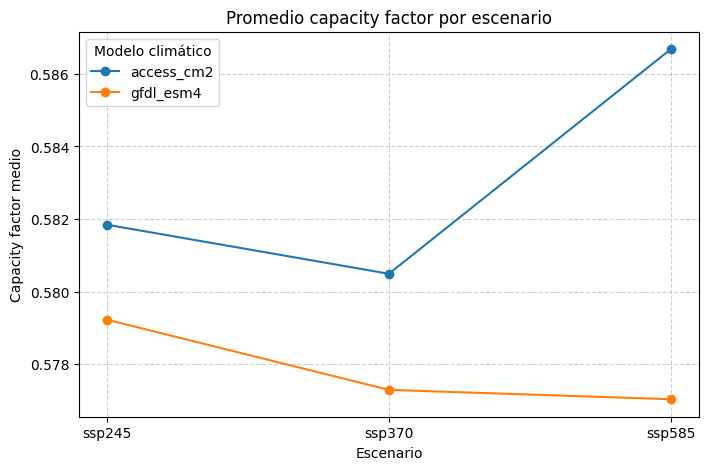

In [15]:
# Gráfico comparativo
plt.figure(figsize=(8,5))
for model in cf_mean["model"].unique():
    subset = cf_mean[cf_mean["model"] == model]
    plt.plot(subset["scenario"], subset["rsds_bc"], marker="o", label=model)

plt.title("Promedio capacity factor por escenario")
plt.ylabel("Capacity factor medio")
plt.xlabel("Escenario")
plt.legend(title="Modelo climático")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [18]:
# Extraer año
data["year"] = data["timesteps"].dt.year

In [19]:
# Promedio anual de CF por escenario y modelo
cf_yearly = (
    data.groupby(["model", "scenario", "year"])
    .mean(numeric_only=True)
    .reset_index()
)

In [20]:
print(cf_yearly.head())

        model scenario  year   rsds_bc
0  access_cm2   ssp245  2015  0.575167
1  access_cm2   ssp245  2016  0.572667
2  access_cm2   ssp245  2017  0.576250
3  access_cm2   ssp245  2018  0.564917
4  access_cm2   ssp245  2019  0.575000


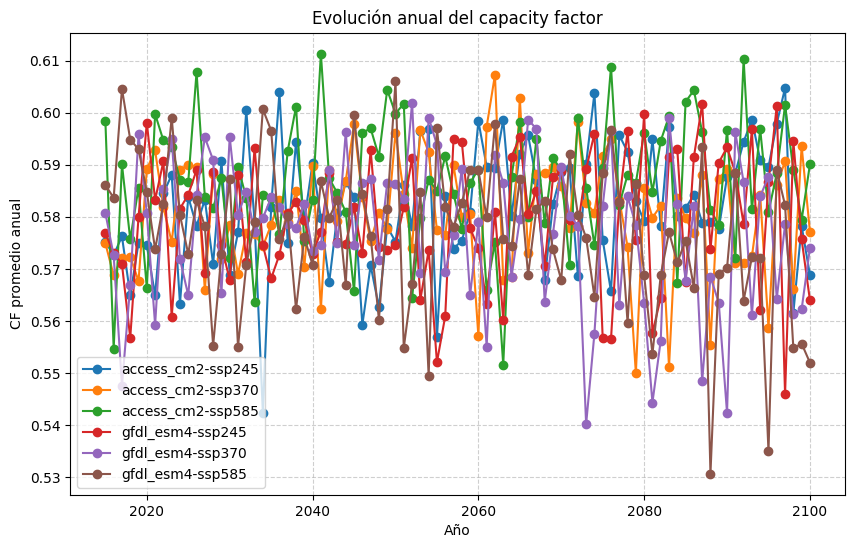

In [22]:
# === Gráfico por año ===
plt.figure(figsize=(10,6))
for model in cf_yearly["model"].unique():
    subset = cf_yearly[cf_yearly["model"] == model]
    for scenario in subset["scenario"].unique():
        sdata = subset[subset["scenario"] == scenario]
        plt.plot(
            sdata["year"], sdata["rsds_bc"], marker="o",
            label=f"{model}-{scenario}"
        )

plt.title("Evolución anual del capacity factor")
plt.ylabel("CF promedio anual")
plt.xlabel("Año")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()